# Getting Started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# Load the dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\SMS spam detection\Data\SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])

# Check the first few rows of the dataset
df.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing the Data

In [2]:
# Lowercase the messages
df['message'] = df['message'].str.lower()
#Ensures consistency. It treats words like "Hello" and "hello" the same, thereby reducing the overall vocabulary size and ensuring that the model doesn't treat different casings of the same word as different words.

In [3]:
# Remove punctuation and numbers
import string
df['message'] = df['message'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation and not char.isdigit()]))
# Punctuation and numbers might not carry significant meaning for certain tasks. By removing them, you simplify the text data, making it easier for the model to focus on the actual words.

In [4]:
# Tokenize messages
df['tokens'] = df['message'].apply(lambda x: x.split())
#Tokenization is a foundational step in many Natural Language Processing (NLP) tasks. By converting a text (sentence or paragraph) into individual words or "tokens", it makes subsequent processing and analysis more manageable and meaningful.

In [10]:
# Remove stop words
from gensim.parsing.preprocessing import remove_stopwords
df['no_stopwords'] = df['message'].apply(remove_stopwords)
#Tokenization allows for easy removal of stopwords (common words like 'and', 'the', 'is', etc. that may not carry significant meaning in certain analyses).

In [11]:
df.head()

,label,message,tokens,no_stopwords
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",jurong point crazy available bugis n great wor...
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",u dun early hor u c
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",nah dont think goes usf lives


# Vectorization

In [ ]:
#Vectorization is the process of converting text data into numerical representations (vectors) that machine learning algorithms can understand and process. 
#Since ML algorithms require numerical input, we can't directly feed raw text into them.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF Vectorizer: This specific vectorizer transforms text into vectors where each word's value is weighted by its frequency in a document relative to its frequency across all documents. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['message'])
# Create and fit the vectorizer
y = df['label']  
#This simply extracts the target variable (in this case, the label indicating whether a message is spam or not).

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.naive_bayes import MultinomialNB
#This is the Multinomial Naive Bayes classifier, suitable for classification with discrete features (like word counts or TF-IDF values for text classification).
from sklearn.metrics import classification_report, confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Checking out the accuracy

In [22]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



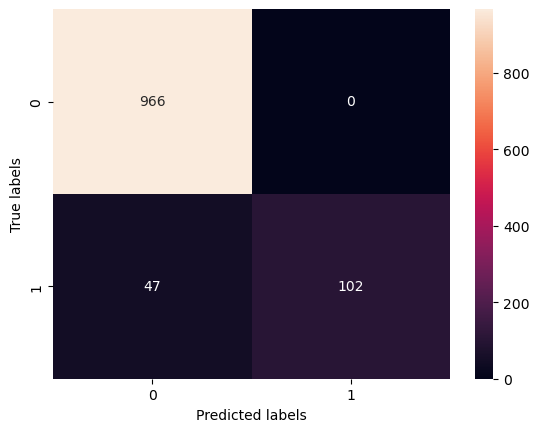

In [23]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
